#1. Problem statement:

Customer churn is a major problem for businesses of all sizes. In the telecommunications industry, for example, the average annual churn rate is 15-25%. This means that businesses are constantly losing customers, which can have a significant impact on their bottom line. There are a number of factors that can contribute to customer churn, such as:


*   Poor customer service
*   High prices
*   Lack of competitive products or services
*   Competition from other businesses
*   Changes in customer needs or preferences

By understanding the factors that contribute to customer churn, businesses can take steps to reduce it. This can include improving customer service, offering competitive prices, and developing new products and services that meet the needs of their customers.

# 2. Project Objective:

The objective of this project is to perform exploratory data analysis (EDA) to gain insights and understanding into customer churn behavior. The primary goal is to identify the key factors that contribute to customer churn and develop actionable recommendations to mitigate churn and improve customer retention.



# 3. Data set description:
The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Reading data
df = pd.read_csv("/content/customer_churn.csv",encoding="latin8")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#4. Performing EDA

In [3]:
print("Shape of the data frame: ",df.shape)

Shape of the data frame:  (7043, 21)


In [4]:
print("Null values present in the dataset:\n",df.isna().sum())

Null values present in the dataset:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Summarizing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  <h4><center>Observations</center></h4>:
* Most of the features are categorical.
* Data contains no null values.
* Confusingly, TotalCahrges is in "String" format and SeniorCitizen is also in "String" format. This could be a mistake in the data. We should pay attention to this while visualizing the data as a part of univariate or multivariate analysis.


*    `TotalCharges`: 11 NaN values are found. These nulls should be handled properly using imputation techniques during feature engineering.







In [6]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(str)


In [7]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.replace({"TotalCharges":" "},np.nan,inplace=True)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


##4.1 Understanding the distrubution of the Target variable

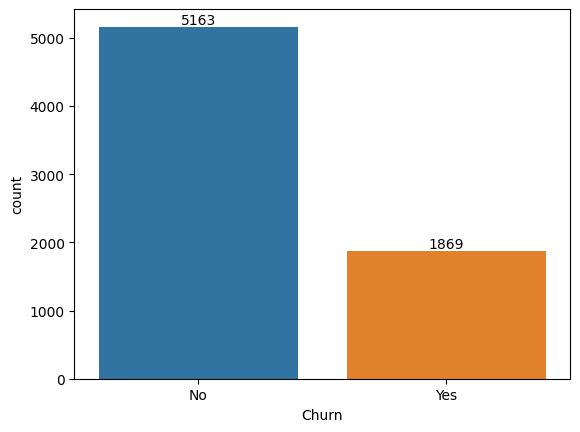

In [15]:
#Target 🎯
a=sns.countplot(data=df,x='Churn')
for i in a.containers:
  a.bar_label(i)


####  <h4><center>Observations</center></h4>:
As per the distribution, it is clear that the dataset is imbalanced.

## 4.2 Analysing the  numerical variables:
[SeniorCitizen, tenure, MonthlyCharges, TotalCharges]

In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


####  <h4><center>Observations</center></h4>:
* `SeniorCitizen`: Looks like this is a categorical representation of whether the citizen is Senior or not.

* `tenure`: 75 percentile of the customer base is under 55 months tenure. That means loyal customers are existing in a good number

* `MonthlyCharges`: No null values exisit in the data.

* `TotalCharges`: 11 NaN values are found. These nulls should be handled properly using imputation techniques during feature engineering.



Text(0.5, 0, 'Total Payment Amount')

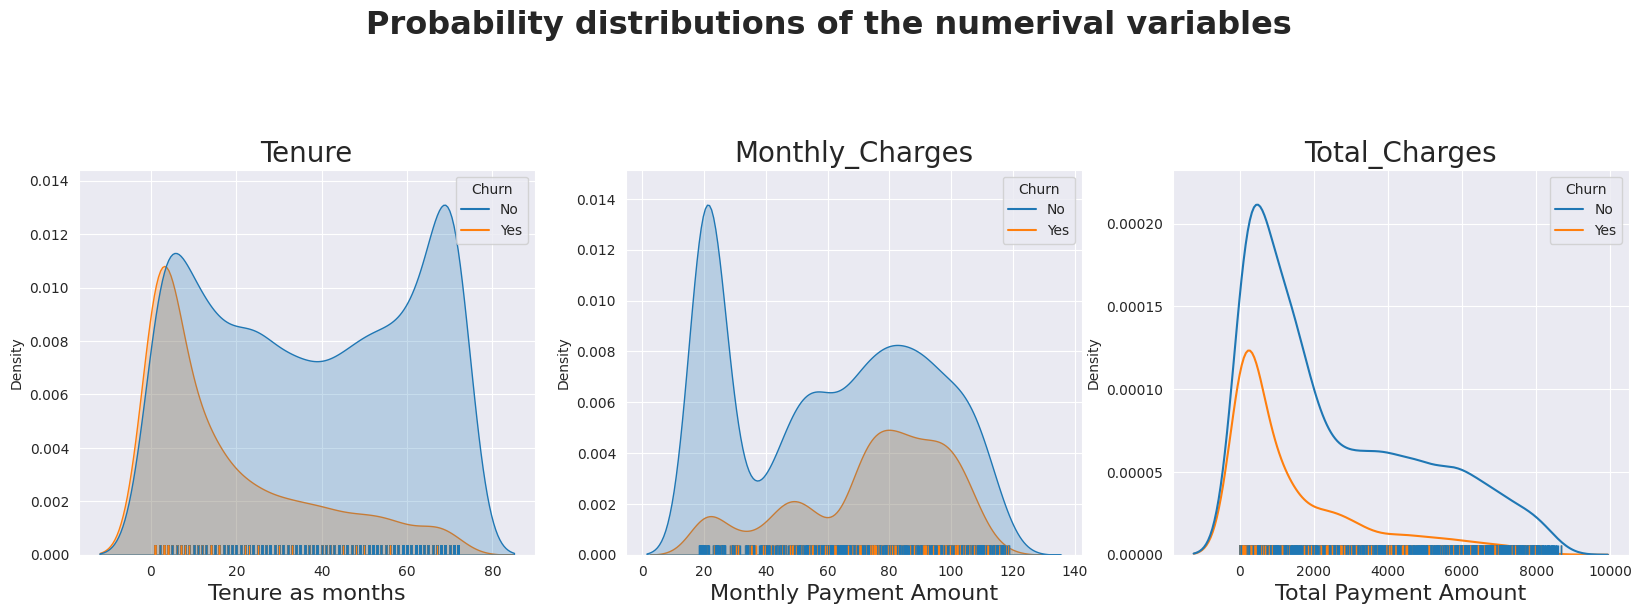

In [17]:
sns.set_style(style='darkgrid')
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(20,5),sharex=False,sharey=False)
plt.suptitle(t='Probability distributions of the numerival variables',fontsize=23,fontweight='bold',y=1.2)
#Tenure
sns.kdeplot(data=df,x='tenure',hue="Churn",ax=axis[0],shade=True)
sns.rugplot(data=df,x='tenure',ax=axis[0],hue="Churn")
axis[0].set_title("Tenure",fontsize=20)
axis[0].set_xlabel("Tenure as months",fontsize=16)

#Monthly Charges
sns.kdeplot(data=df,x='MonthlyCharges',hue="Churn",ax=axis[1],shade=True)
sns.rugplot(data=df,x='MonthlyCharges',hue="Churn",ax=axis[1])
axis[1].set_title("Monthly_Charges",fontsize=20)
axis[1].set_xlabel("Monthly Payment Amount",fontsize=16)

#Total charges
sns.kdeplot(data=df,x='TotalCharges',hue="Churn",ax=axis[2],)
sns.rugplot(data=df,x='TotalCharges',hue="Churn",ax=axis[2])
axis[2].set_title("Total_Charges",fontsize=20)
axis[2].set_xlabel("Total Payment Amount",fontsize=16)

#  <h4><center>Observations</center></h4>
1. `Tenure` distribution is appearing to be **bimodal distribution**. Majority of the customer are tend to be either **relatively new (0-10 months)** or tend to be willing to stay for more period(>5 years).


*   
     **75 percentile** of the customer base is under **55 months tenure**. That means **loyal customers** are existing in a good number

*  **0-20 Months** of Tenure Range,**53.5%(3764)** of Customer's are likely to fall in this range and most of them are likey to **Churn**.

*   **21% (1483)** are selecting 60-72 Months.
     

---


2. `MonthlyCharge` **distribution resembles bimodel** distribution with a** slight peak in the middle**. As per the distribution, it is clear that Majority of the customers are preferring either low monthly payments or willing to pay high payments.
*   **Customer's who are paying between 75 and 100 are likely to churn.**


---


3. `TotalCharges` **distribution is a right skewed distribution**, that indicates most of the customers are opting for lower Totalpayments.
*   **50 Percentile(1397)** **of the Customer's TotalCharges are less than the Mean of TotalCharges(2283.300441)**
*   It says that most of the Customers Churning with **<20 Months.**

## 4.3. Analysing the Categorical features.

In [18]:
#Categorical columns
categorical=df.drop(["Churn","customerID"],axis=1).select_dtypes(include=["object"])
categorical.replace(to_replace={"SeniorCitizen":{"0":"No","1":"Yes"}},inplace=True)
categorical=categorical.columns




In [19]:
categorical


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

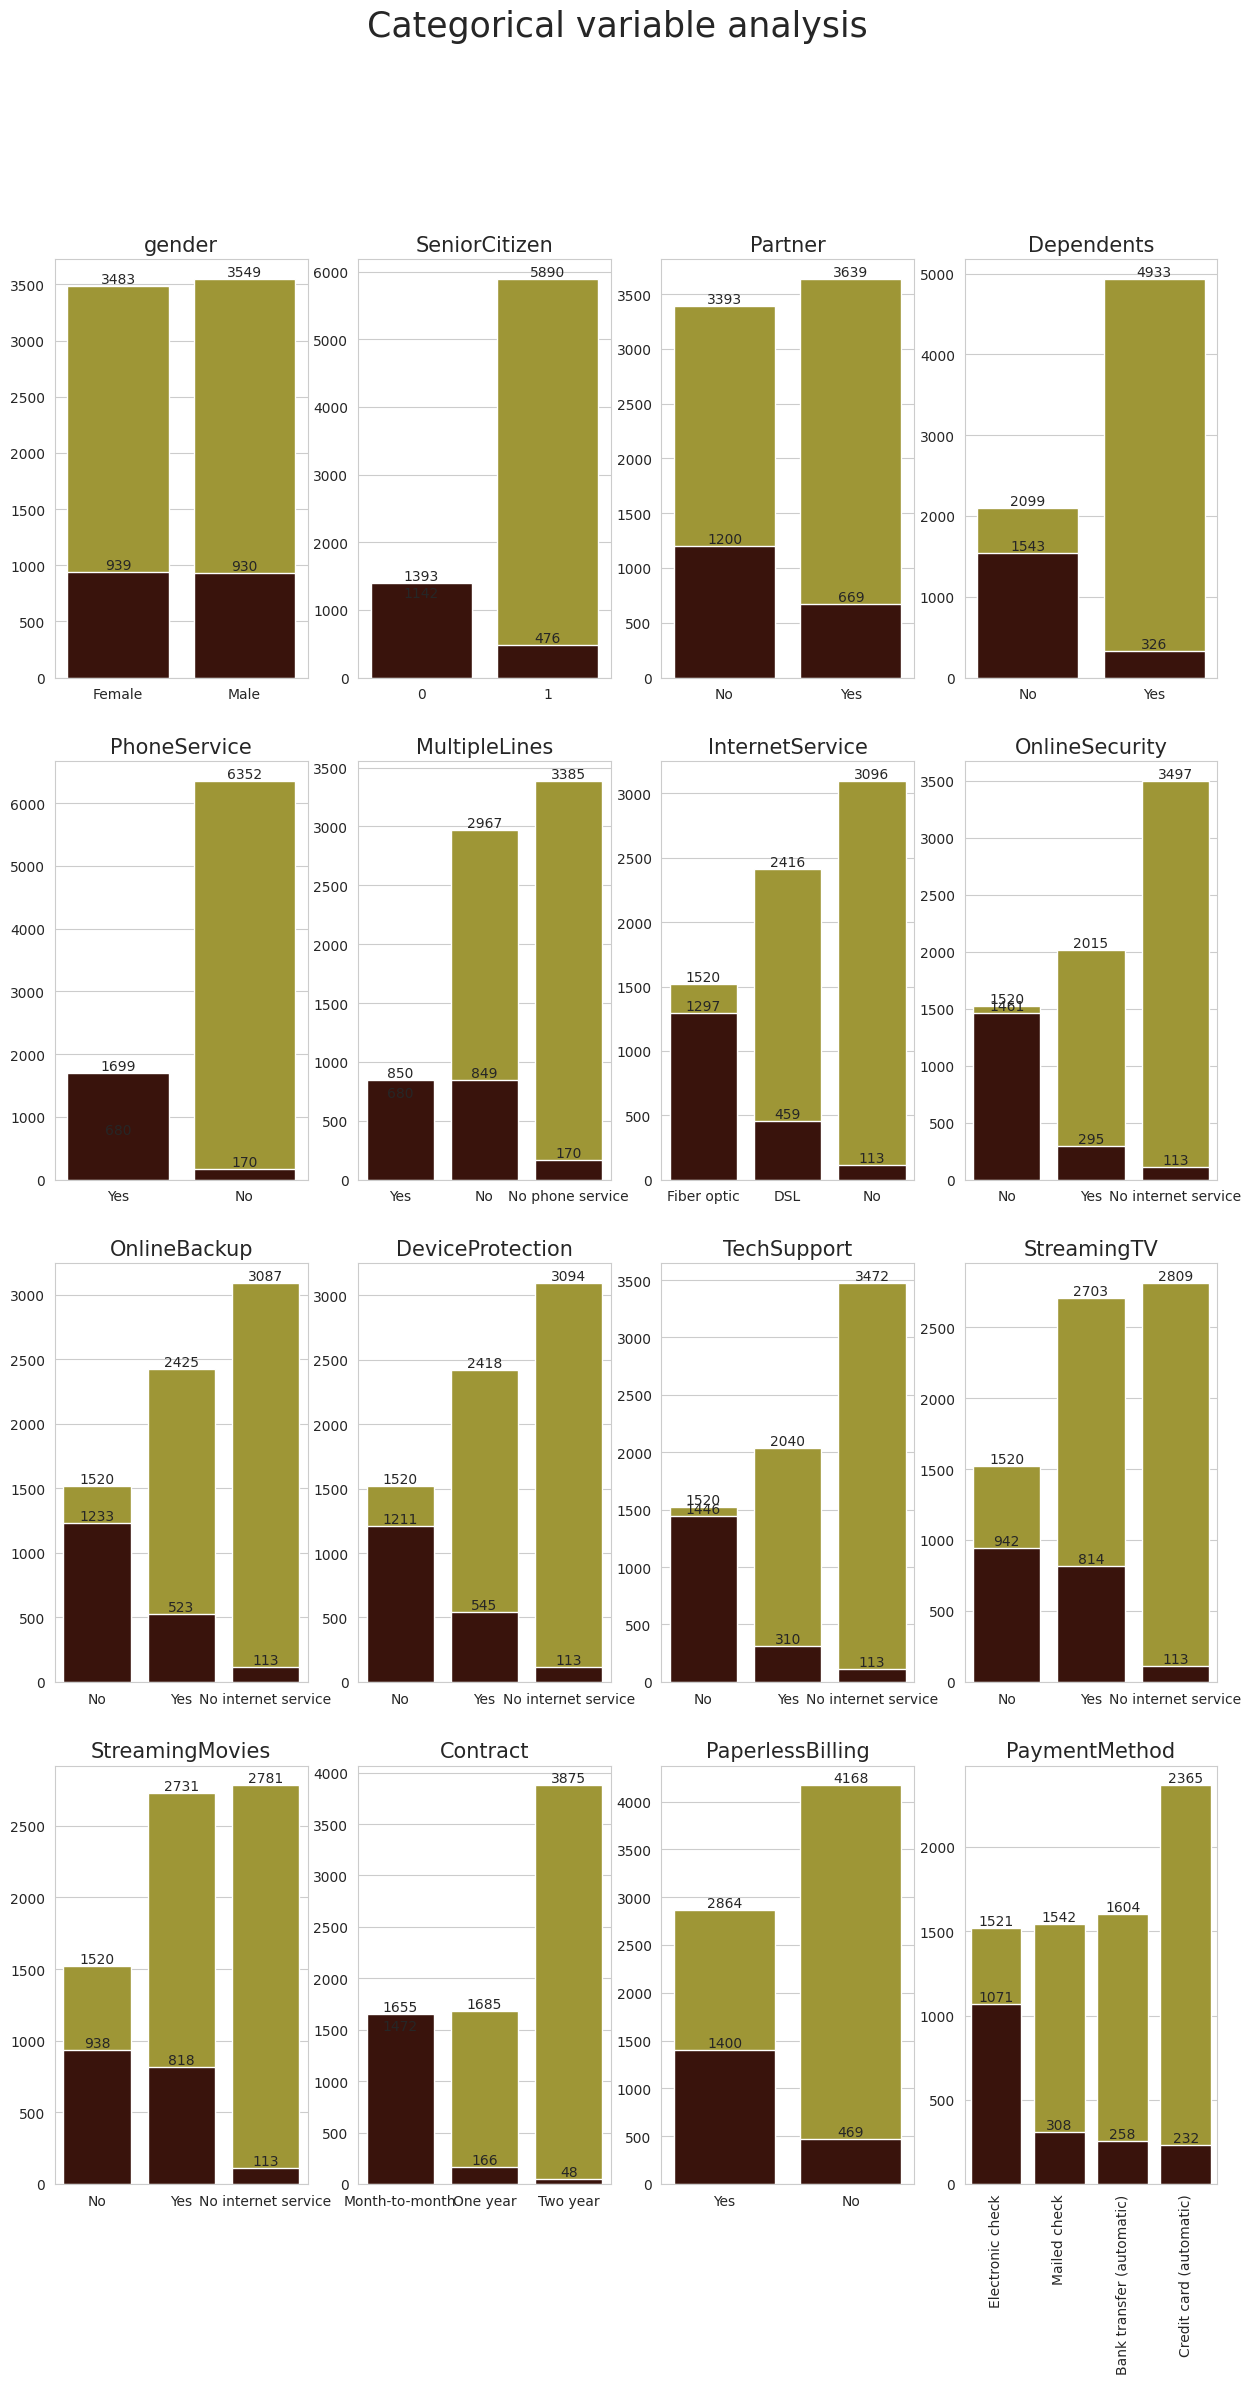

In [20]:
#categorical Analysis
sns.set_style(style="whitegrid")
fig,axis=plt.subplots(nrows=4,ncols=4,sharey=False,sharex=False,figsize=(15,25))
plt.suptitle("Categorical variable analysis",fontsize=25,fontweight=10)

count=0
for i in range(4):
  for j in range(4):
    data=df[categorical[count]].value_counts().sort_values()
    churn_data=df[df["Churn"]=="Yes"][categorical[count]].value_counts()


    sns.barplot(x=data.index,y=data.values,ax=axis[i][j],color="#AFA425")
    a=sns.barplot(x=churn_data.index,y=churn_data.values,ax=axis[i][j],color="#410E04")
    axis[i][j].set_title(categorical[count],fontsize=15)
    plt.xticks(rotation=90)

    for l in a.containers:
      a.bar_label(l)
    count+=1



####          Exploring Customer Churn Patterns

In our analysis of customer churn, we examined a dataset that encompasses various attributes related to customer behavior and demographics.

**Gender-wise**, the data reveals a nearly **equal distribution between males and females**. This suggests that **gender alone may not be a significant factor** influencing **churn**.

*   Surprisingly, the churn count is identical for both males and females.
*   This implies that gender may not be a distinguishing factor when it comes to customer churn.

**Non-senior citizens** represent the **majority** in our dataset, indicating that the customer base consists mostly of** younger individuals**. However, it is noteworthy that approximately **41.68% of senior citizens are likely to churn**.

*   Indicating a potential area of concern for customer retention efforts.


We observed that around **33% of customers without a partner are likely to churn**.
*   This finding suggests that customers without a partner might have
different needs or expectations that contribute to their likelihood of leaving the service.


*   A significant portion of the customer base, specifically 4933 individuals, are non-dependents.
*   **Approximately 31.27% of these non-dependents are likely to churn**.

##Phone service is widely adopted among the customers in the dataset.


*   with almost 90% utilizing this service.
*   Interestingly, among the phone service customers, around 26.7% (1699) are likely to churn.**indicating a noteworthy churn rate within this group.**


*   On the other hand, 25% (170) of non-phone service customers also display a propensity to churn, suggesting that the **absence of phone service** **does not** necessarily **guarantee customer loyalty**.


####When it comes to multiple lines


*  Nearly 48% of customers do not use this feature. Meanwhile, around 42% of
customers utilize multiple lines.
*  Interestingly, the churn count is similar for both groups, suggesting that the presence or absence of multiple lines may not be a decisive factor in customer churn.

Our analysis also revealed that customers **who do not use online backup services are likely to churn**.

*   This finding underscores the importance of offering reliable backup options to enhance customer satisfaction and retention.


## Apparantly important features:


1.   **Contract:** The longer the contract, less likely the customer to churn
2.   **PaymentMethod:** Majority of the customers who are churning are electronic check payment method.
3.   
Customers having no **TechSupport, no OnlineBackup and no DeviceProtection are likely to churn more**.
4.   **InternetServices:** Customers who are having optic fiber are more likely to churn.
5.  **OnlineSecurity:** Customers with no online security are willing to churn more.





##4.4 Outlayer Analysis of Numerical Values

In [21]:

df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

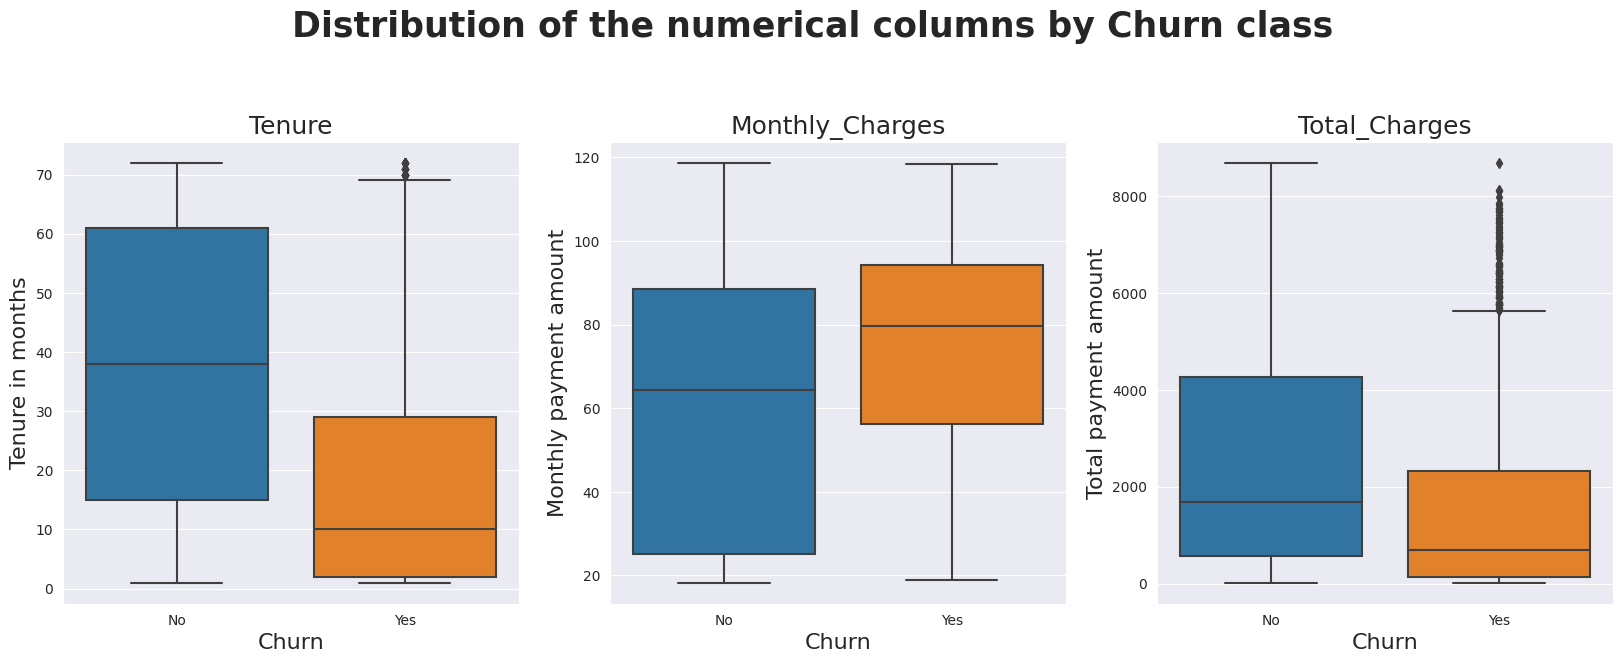

In [22]:
sns.set_style(style='darkgrid')
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
plt.suptitle("Distribution of the numerical columns by Churn class",fontsize=25,y=1.1,fontweight='bold')

# Tenure
sns.boxplot(data=df,x='Churn',y='tenure',ax=axis[0])
axis[0].set_title('Tenure',fontsize=18)
axis[0].set_xlabel('Churn',fontsize=16)
axis[0].set_ylabel("Tenure in months",fontsize=16)


# Monthly_Charges
sns.boxplot(data=df,x='Churn',y='MonthlyCharges',ax=axis[1])
axis[1].set_title("Monthly_Charges",fontsize=18)
axis[1].set_xlabel('Churn',fontsize=16)
axis[1].set_ylabel('Monthly payment amount',fontsize=16)


# Total_Charges

sns.boxplot(data=df,x='Churn',y='TotalCharges',ax = axis[2])
axis[2].set_title("Total_Charges",fontsize=18)
axis[2].set_xlabel("Churn",fontsize=16)
axis[2].set_ylabel("Total payment amount",fontsize=16)

plt.show()


# <h4><center>Observations</center></h4>
1. `Tenure`: Customers who churned are the customers that spend less time with the company.

2. `MonthlyCharges`: Customers who churned tend to have higher monthly charge amount than other non churn customers.

3. `TotalCharges`: Churned customers are having low `TotalCharges` comparing to non-churned members.

* By looking at the `TotalCharges` distribution, we can find some **descent no of outlined observations.** **These outliers indicates that there are considerable no of customers who stayed with the company for a long time and they tend to churn because of some x factors**. Generally speaking they are the very old customers who stayed with the company over years and paid high `TotalCharges`.

Let's try to understand more about these outlier observations.

###4.4.1 Analysis on Outlayers

In [23]:
#outlayer of Totalcharges


q1  = df[df['Churn']=='Yes']['TotalCharges'].quantile(0.25)
q3  = df[df['Churn']=='Yes']['TotalCharges'].quantile(0.75)
iqr = q3-q1
lower_bound = q1-iqr*1.5
upper_bound = q3+iqr*1.5
print("Lower bound is: ",lower_bound)
print("Upper bound is: ", upper_bound)


print("no of customers in the outlined region: ",len(df[(df['Churn']=='Yes')&(df['TotalCharges']>upper_bound)]))

outliers = df[(df['Churn']=='Yes')&(df['TotalCharges']>upper_bound)]
# Total amount received by the outlined customers in the form of TotalCharges
total_paymet_received = outliers['TotalCharges'].sum()
print("Total amount received by the outlined customers in the form of TotalCharges: ", total_paymet_received)
print("Total amount recieved amount by all the customers: ",df['TotalCharges'].sum())
print("Avg amount spend by each outlined customer: ",outliers['TotalCharges'].mean())


Lower bound is:  -3160.7000000000003
Upper bound is:  5626.5
no of customers in the outlined region:  109
Total amount received by the outlined customers in the form of TotalCharges:  727060.6500000001
Total amount recieved amount by all the customers:  16056168.700000001
Avg amount spend by each outlined customer:  6670.281192660552


In [24]:
outliers.shape

(109, 21)

In [25]:
outliers.describe()

,tenure,MonthlyCharges,TotalCharges
count,109.000000,109.000000,109.000000
mean,63.880734,104.147706,6670.281193
std,5.483519,6.574359,695.562975
min,52.000000,83.000000,5638.300000
25%,59.000000,100.200000,6125.400000
50%,65.000000,105.000000,6579.050000
75%,68.000000,108.600000,7176.550000
max,72.000000,118.350000,8684.800000


### 4.4.2 Analysis on High Paying Customer churn

In [26]:
#Categorical columns
categorical=outliers.drop(["Churn","customerID"],axis=1).select_dtypes(include=["object"])
categorical.replace(to_replace={"SeniorCitizen":{"0":"No","1":"Yes"}},inplace=True)
categorical=categorical.columns

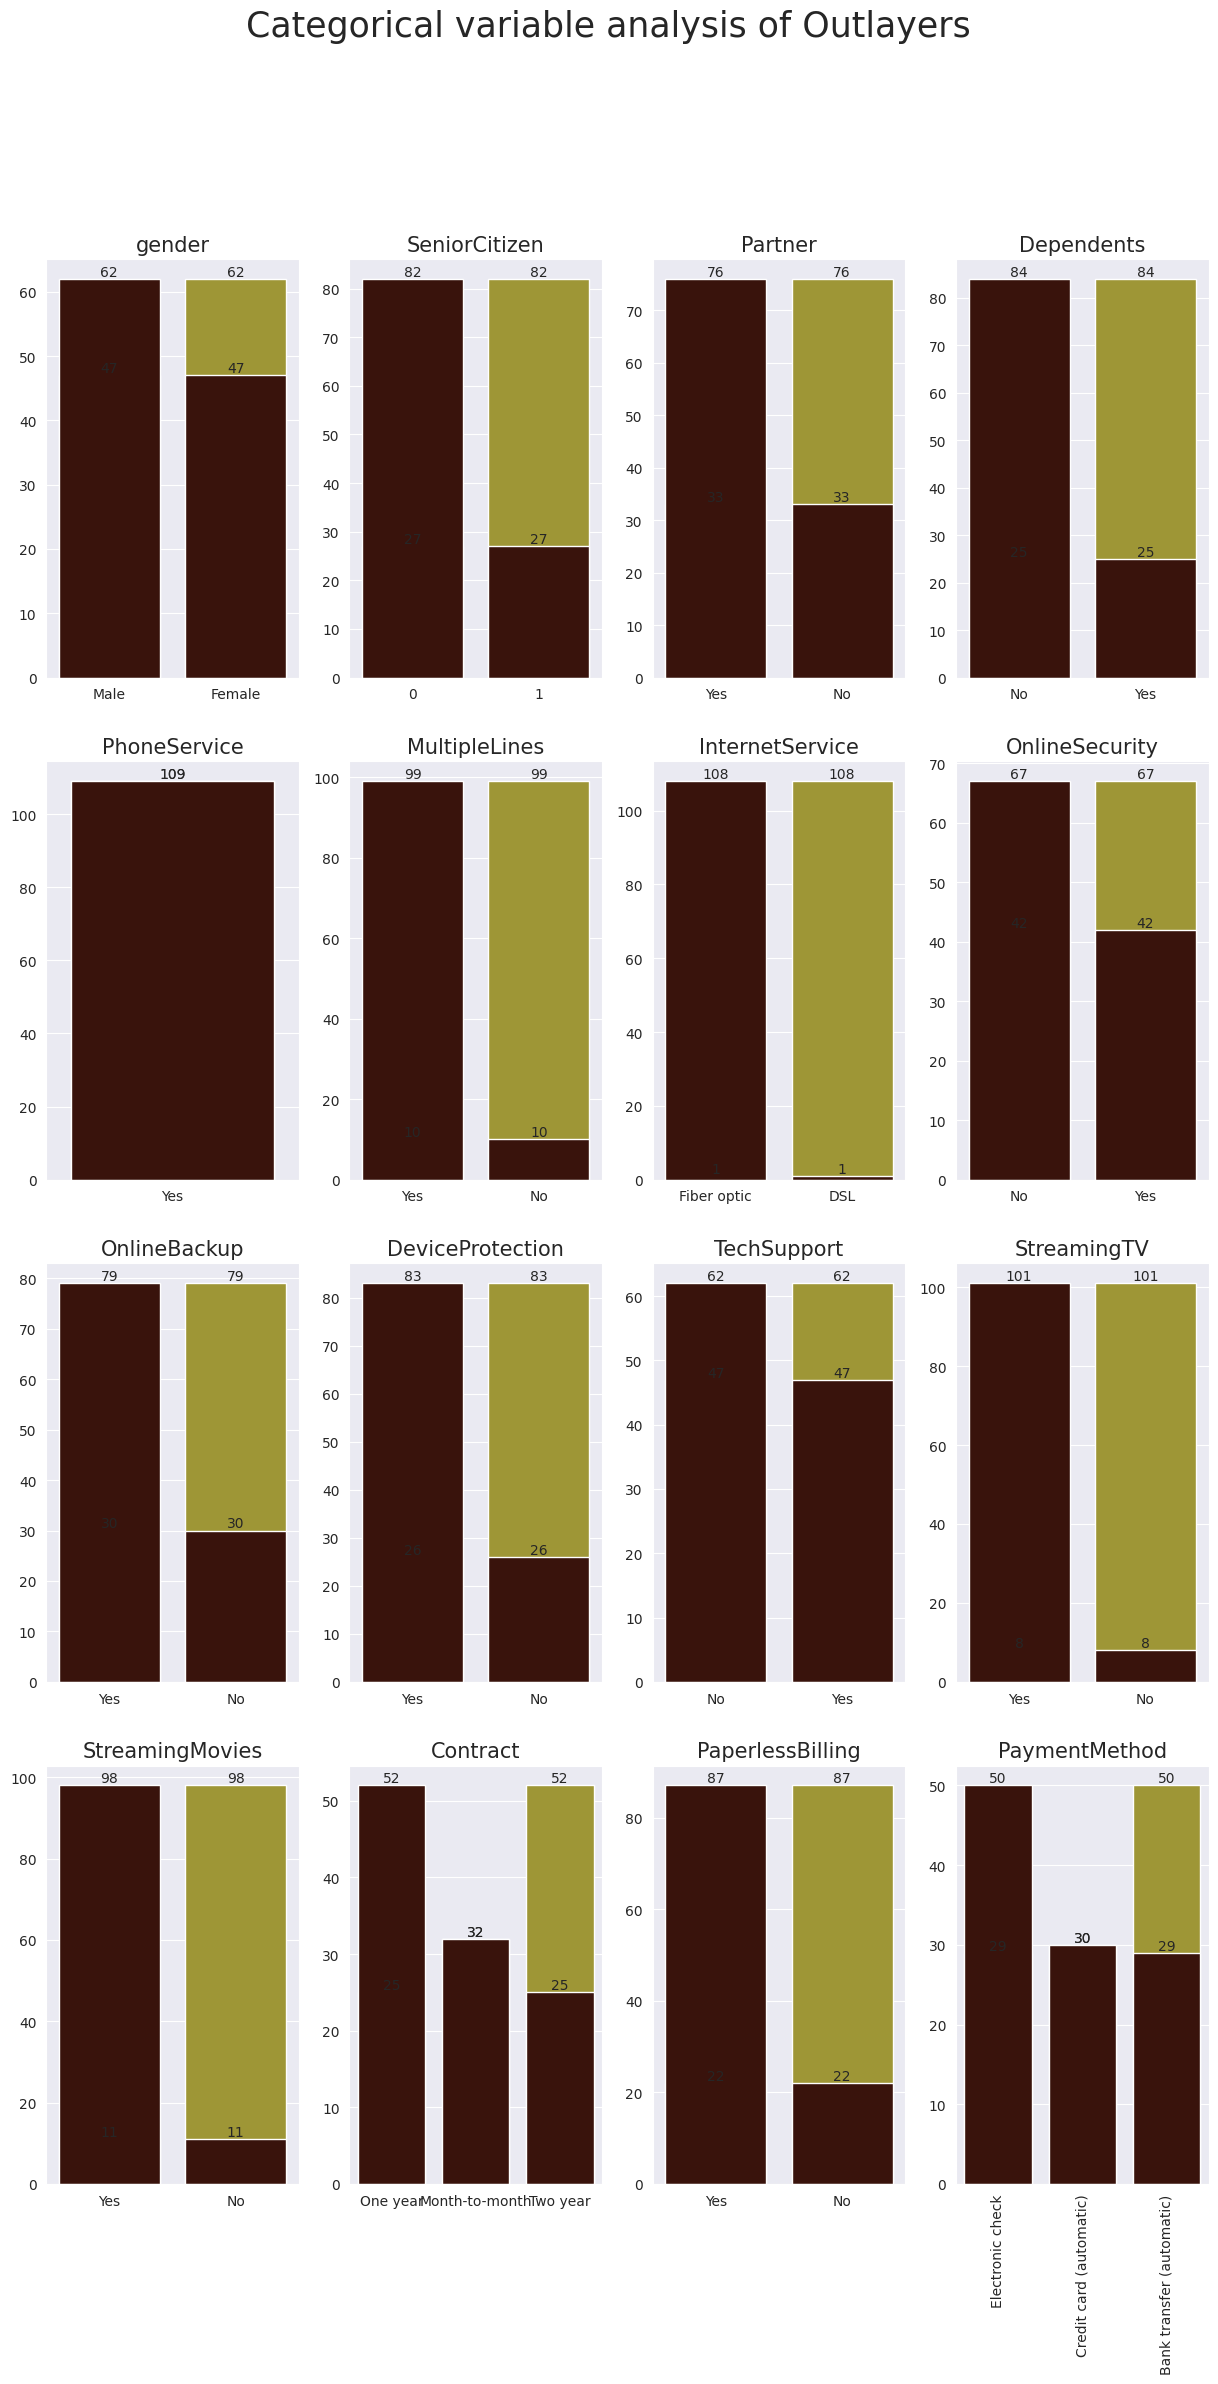

In [27]:
#categorical Analysis
sns.set_style(style="darkgrid")
fig,axis=plt.subplots(nrows=4,ncols=4,sharey=False,sharex=False,figsize=(15,25))
plt.suptitle("Categorical variable analysis of Outlayers",fontsize=25,fontweight=10)

count=0
for i in range(4):
  for j in range(4):
    data=outliers[categorical[count]].value_counts().sort_values()
    churn_data=outliers[categorical[count]].value_counts()


    a=sns.barplot(x=data.index,y=data.values,ax=axis[i][j],color="#AFA425")
    sns.barplot(x=churn_data.index,y=churn_data.values,ax=axis[i][j],color="#410E04")
    axis[i][j].set_title(categorical[count],fontsize=15)
    plt.xticks(rotation=90)

    for l in a.containers:
      a.bar_label(l)
    count+=1

### 4.4.3 Analysis of churn customer behavior in first 5 Months

In [28]:
temp=df[df["tenure"]<=5]

In [29]:
temp.shape

(1360, 21)

In [30]:
temp.describe()

,tenure,MonthlyCharges,TotalCharges
count,1360.000000,1360.000000,1360.000000
mean,2.248529,54.696728,128.064449
std,1.391131,25.728430,111.282771
min,1.000000,18.750000,18.800000
25%,1.000000,25.137500,48.525000
50%,2.000000,54.700000,80.975000
75%,3.000000,75.550000,183.837500
max,5.000000,107.950000,550.600000


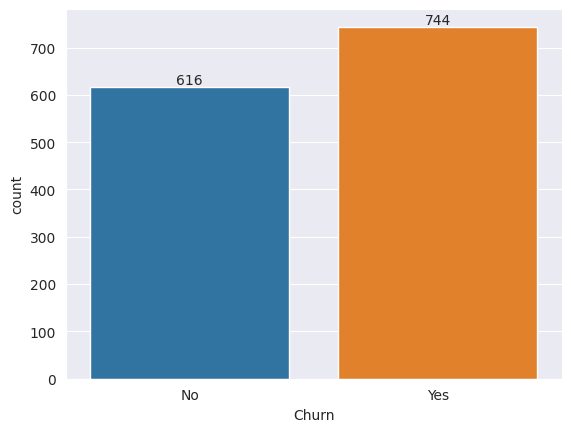

In [31]:
temp["Churn"].value_counts()
a=sns.countplot(data=temp,x=temp["Churn"])
for i in a.containers:
  a.bar_label(i)


###Unveiling Customer Churn Insights on the Analysis of Outlayers

The data reveals that there are 109 customers identified as outlayer Points, representing potential anomalies or extreme values within the dataset.


*   Additionally, the mean amount in the dataset is $6,670.28, giving us an idea of the average customer expenditure.


**Surprisingly, all phone service customers are likely to churn.**
*  This suggests that the phone service alone may not be a significant factor in retaining customers.

Furthermore, customers who are **using FiberOptic under the internet service are more prone to churn.**
*  This finding suggests the need for improvement in the quality or pricing of the FiberOptic service to enhance customer satisfaction and loyalty.

Interestingly, customers who use multiple lines, along with services such as OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, are more likely to churn.

**When examining the contract length, customers with a one-year contract are more likely to churn.**

###To gain deeper insights into customer churn behavior
####we focused our analysis on the first five months of data.


*   Out of the 1,360 customers considered, a significant number of 744 customers are churning.
*    This indicates a churn rate of approximately 54%, reflecting a substantial impact on the business.

Furthermore, it is apparent that **this business operates on a subscription-based model**, as the MonthlyCharges and TotalCharges variables do not show a strong correlation. This implies that the billing amount alone does not significantly affect customer churn.









##4.5 Checking for correlation within the numerical data.
* If The variables are extreemly correlated with each other then some of the features can be dropped to avoid the problem of multicollinearity

<Axes: >

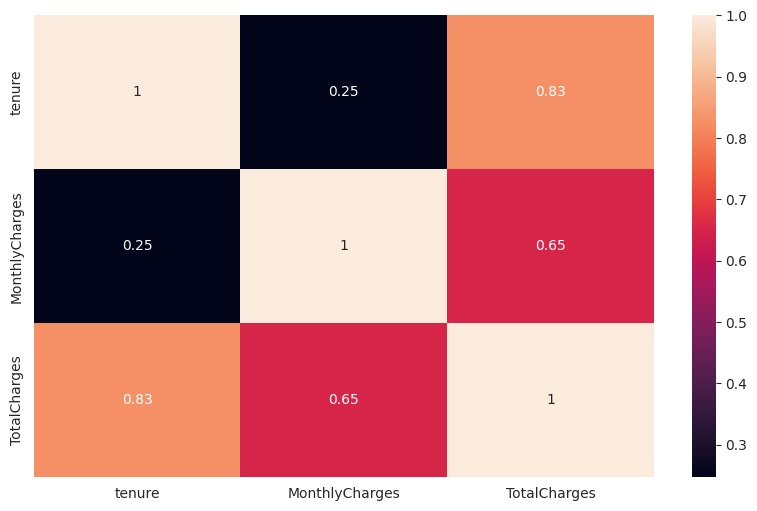

In [32]:
# Generating correlation matrix and visualising with heatmap
corre_matrix = df[['tenure','MonthlyCharges','TotalCharges']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corre_matrix,annot=True,cbar='cmap')

* `tenure` and `TotalCharges` are correlated with each other with a factor of 0.83. This is obivious that, more `tenure` indicates more `TotalCharges` from the customer. But this is not such a high correlation to drop any one feature. So we will be continuing with both the features.

* `MonthlyCharges` and `TotalCharges` are moderly correlated. This might be a subscription based bussinesss that's why MonthlyCharges and TotalCharges are not related to such high extent.

#Conclusion
In conclusion, our exploratory data analysis (EDA) of customer churn in the telecommunications industry has provided valuable insights into the factors influencing customer attrition. The analysis revealed several noteworthy patterns and observations:

1.  Most of the features in the dataset are categorical, which requires careful consideration during data visualization and analysis.
2. The data contains no null values, ensuring data completeness.
3.  An **anomaly was observed** with the data representation of **"TotalCharges"**variables, which may require **further investigation and data correction.**
4.  The **bimodal distribution of tenure** suggests that **customers tend to either be relatively new or exhibit long-term loyalty.**
5.  A substantial number of **customers (53.5%)** with** tenure between 0-20 months are likely to churn**, **indicating a critical period for customer retention efforts.**
6.  **Customers** with a **tenure range of 60-72 months** accounted for **21% of the dataset**, **implying a segment with higher loyalty.**
7.  **MonthlyCharges exhibited a bimodal distribution**, indicating **customer preferences for either low or high payment amounts.**
8.  **TotalCharges showed a right-skewed distribution**, suggesting that **many customers opt for lower total payments.**
9. **Gender did not appear** to be a significant factor **influencing churn**.
  **Senior citizens** showed a relatively **high likelihood of churn**, warranting **attention to improve retention efforts within this group.**
10.  **Phone service usage did not guarantee customer loyalty,** as both phone service customers and non-phone service customers displayed a propensity to churn.
11.  **Contract length played a crucial role**, with **one-year contract customers** showing a higher **likelihood of churn**.

12.  The **analysis of outliers** indicated a **group of long-term customers with high TotalCharges who exhibited a propensity to churn.**
13.  **The analysis revealed a churn rate of approximately 54% within the first five months**, **underscoring the significant impact of customer churn on the business.**
14.  **MonthlyCharges and TotalCharges showed a moderate correlation**, suggesting a **subscription-based business model** where the billing amount alone does not significantly impact churn.

####In conclusion, our EDA highlights the importance of understanding customer behavior and identifying key factors that contribute to churn in the telecommunications industry. The insights gained from this analysis can inform targeted strategies to improve customer retention, enhance service offerings, and drive business growth.

In [33]:
print("Done")

Done
